In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from em_el.datasets import load_wine

In [6]:
penguins = sns.load_dataset('penguins').dropna()
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
y = penguins['species'].to_numpy()
X_scaled = StandardScaler().fit_transform(X)

In [7]:
pca = PCA()
pca.fit(X_scaled)

per_var = np.round(pca.explained_variance_ratio_, 5)
print(f"PCA Explained Variance Ratio: {per_var}")

PCA Explained Variance Ratio: [0.68634 0.19453 0.09216 0.02697]


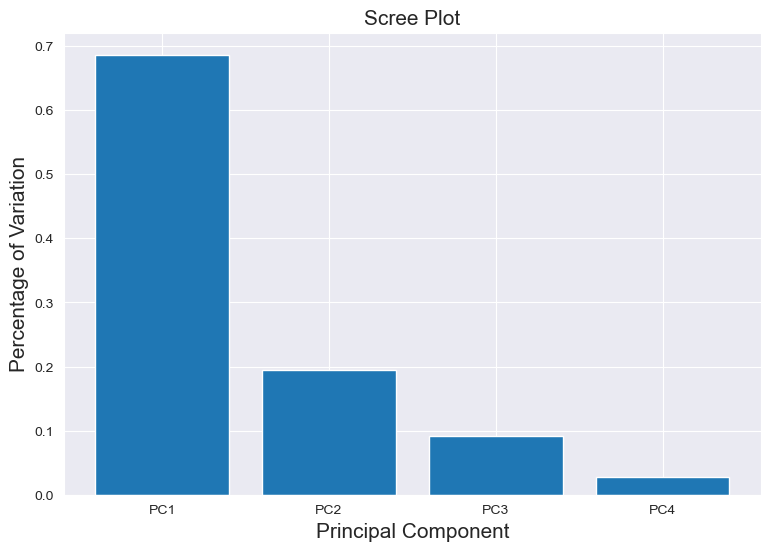

In [8]:
labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (9, 6))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

Principal Component 1 clearly accounts for the most variation.

In [9]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4
bill_length_mm,0.453753,-0.399047,0.576825,0.549675
bill_depth_mm,0.600195,0.796170,0.005788,0.076464
flipper_length_mm,0.642495,-0.425800,-0.236095,-0.591737
body_mass_g,0.145170,-0.159904,-0.781984,0.584686


In [10]:
pca_data = pca.transform(X_scaled)
pca_df = pd.DataFrame(pca_data, columns = labels)

projected_df = pd.concat([pca_df, pd.Series(y)], axis = 1)
projected_df = projected_df.rename(columns={0:'species'})
print(projected_df.head())

        PC1       PC2       PC3       PC4 species
0 -1.853593  0.032069 -0.234902  0.528397  Adelie
1 -1.316254 -0.443527 -0.027470  0.401727  Adelie
2 -1.376605 -0.161230  0.189689 -0.528662  Adelie
3 -1.885288 -0.012351 -0.628873 -0.472893  Adelie
4 -1.919981  0.817598 -0.701051 -0.196416  Adelie


In [11]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Chinstrap":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]
projected_df['color'] = c

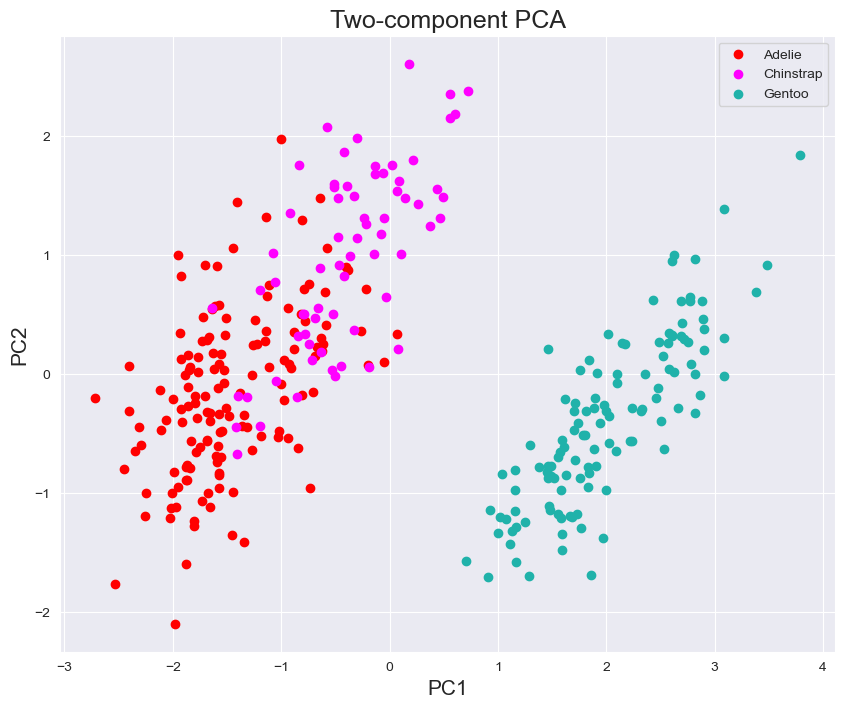

In [12]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)

plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

### Dimensionality Reduction on Wine Dataset

Recall the wine dataset from the KNN implementation. We observed that the higher dimensionality feature array led to poorer performance than a lower dimensionality array. This lower dimensionality array simply used a subset of the features.

Here, we will use PCA to more robustly account for the other features while still decreasing the feature array's dimensionality.

In [3]:
wine = load_wine()
X_raw = wine.drop('target', axis=1).to_numpy()
y = wine['target']
X = StandardScaler().fit_transform(X_raw)

In [5]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X)

per_var = np.round(pca.explained_variance_ratio_, 5)
print(f"PCA Explained Variance Ratio: {per_var}")
print(f"Total Variation Accounted for = ", sum(per_var))

PCA Explained Variance Ratio: [0.36199 0.19207 0.11124 0.07069 0.06563]
Total Variation Accounted for =  0.80162


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

In [7]:
pca_knn = KNeighborsClassifier(n_neighbors = 5)
pca_knn.fit(X_train, y_train)
y_pred = pca_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy KNN + PCA = {accuracy}; 5 components, 5 neighbors")

Accuracy KNN + PCA = 0.9444444444444444; 5 components, 5 neighbors
